# Labeling: Forward Return

![image_example](img/forward_return_heatmap.png)
_*Fig. 1:*_ One day forward returns on close prices for 5 tech stocks between April-May 2020. Darker green means that the forward returns for more stocks were positive.


## Abstract

Labeling forward returns is a simple method of labeling financial data that is similar to labeling raw returns, except instead
of looking at the return from the previous timestamp, the price of each observation is compared to the price at $h$ timestamps in the future. Usually $h$ will be 1. If the price at the next time index is greater than the current price, the observation
will be labeled with a 1. Otherwise, the label will be 0.

The following paper uses this labeling method to train SVMs to predict price movements. ["Financial time series forecasting using support vector machines"](https://www.sciencedirect.com/science/article/abs/pii/S0925231203003722) by Kim, K_ (2016).


## How it works

The input is a pd.Series or pd.DataFrame of stock prices, and the lookforward period, which is usually 1. For the label of an observation with price $p_t$ at time $t$, looking $h$ ticks in the future, the labels will be as such:

$$
     \begin{equation}
     \begin{split}
       L_t = \begin{cases}
       0 &\ \text{if} \ \ p_{t+h} \leq p_t \\
       1 &\ \text{if} \ \ p_{t+h} > p_t
       \end{cases}
     \end{split}
     \end{equation}
$$


---
## Examples of use

In [13]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import yfinance as yf

from mlfinlab.labeling import forward_return

import matplotlib.pyplot as plt

In [2]:
tickers = 'AAPL AMZN GOOG NVDA FB'
data = yf.download(tickers, start="2020-04-1", end="2020-05-25",
                   group_by="ticker")
data = data.loc[:, (slice(None), 'Adj Close')]
data.columns = data.columns.droplevel(1)
data.head()

[*********************100%***********************]  5 of 5 completed


,AMZN,FB,GOOG,NVDA,AAPL
Date,,,,,
2020-04-01,1907.699951,159.600006,1105.619995,242.959137,240.259628
2020-04-02,1918.829956,158.190002,1120.839966,255.353470,244.268768
2020-04-03,1906.589966,154.179993,1097.880005,243.798737,240.758270
2020-04-06,1997.589966,165.550003,1186.920044,268.277557,261.761414
2020-04-07,2011.599976,168.830002,1186.510010,258.911835,258.729614


We can label the this data with the future returns. If the next day's close price is higher, we label with a 1. Otherwise, we label with 0.

In [3]:
labels = forward_return(data)
labels.head()

c:\users\ruifan\mlfinlab\mlfinlab\labeling\forward_return.py:32: RuntimeWarning: invalid value encountered in sign
  returns[to_sign] = np.sign(returns[to_sign])


,AMZN,FB,GOOG,NVDA,AAPL
Date,,,,,
2020-04-01,1.0,0.0,1.0,1.0,1.0
2020-04-02,0.0,0.0,0.0,0.0,0.0
2020-04-03,1.0,1.0,1.0,1.0,1.0
2020-04-06,1.0,1.0,0.0,0.0,0.0
2020-04-07,1.0,1.0,1.0,1.0,1.0


We can use these labels to visualize these returns as a heatmap. Darker green means that more stocks had a positive forward return for the day.

Text(0.5, 32.0, 'Color denoted by number of stocks with positive return')

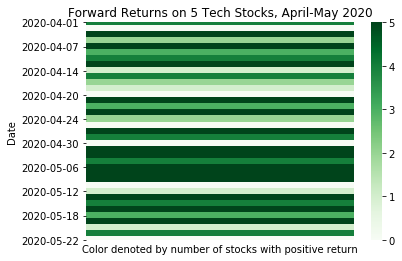

In [31]:
sum_labels = pd.DataFrame(labels.sum(axis=1))
sum_labels.index = sum_labels.index.astype('str')
ax = sns.heatmap(sum_labels, cmap='Greens', xticklabels=False, yticklabels=4)
ax.set_title('Forward Returns on 5 Tech Stocks, April-May 2020')
ax.set_xlabel('Color denoted by number of stocks with positive return')


In [19]:
If desired, we can also look multiple ticks in advance when making the labels.

In [33]:
labels2 = forward_return(data, lookforward=2)
labels2.head()

,AMZN,FB,GOOG,NVDA,AAPL
Date,,,,,
2020-04-01,0.0,0.0,0.0,1.0,1.0
2020-04-02,1.0,1.0,1.0,1.0,1.0
2020-04-03,1.0,1.0,1.0,1.0,1.0
2020-04-06,1.0,1.0,1.0,0.0,1.0
2020-04-07,1.0,1.0,1.0,1.0,1.0


### Error Handling

If lookforward is greater than the number of rows, all results will be NaN and a warning is given. If lookforward is not an int, an exception is raised.

In [34]:
forward_return(data, 'str')

AssertionError: lookforward period must be int!

In [36]:
forward_return(data, lookforward=9999).head()


,AMZN,FB,GOOG,NVDA,AAPL
Date,,,,,
2020-04-01,NaN,NaN,NaN,NaN,NaN
2020-04-02,NaN,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,NaN,NaN,NaN
2020-04-06,NaN,NaN,NaN,NaN,NaN
2020-04-07,NaN,NaN,NaN,NaN,NaN


---
## Conclusion

This notebook demonstrates the forward returns labeling method. In this method, the price at a future time is compared to the observation. If the forward price is greater, then the observation is labeled with a 1. If the forward price is less, it is labeled with a 0. This method is similar to raw returns, though it compared each observation to a forward value rather than a previous one.

## References